# Brif understanding the structure of dataset 
Decision trees work with simple "if" clauses dichotomically chained together, splitting the data flow recursively on those "if"s until they reach a leaf where we can categorize the data. Such data inspection could be used to reverse engineer the behavior of any function.



In [15]:
!pip install graphviz

# About the Car Evaluation Data Set
For more information: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Overview The Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:
# Car accptability:
    - PRICE overall price:
        - **buying** buying price,
      - **maint** price of the maintenance,
    - TECH technical characteristics:,
       - COMFORT comfort:,
          - **doors** number of doors,
          - **persons** capacity in terms of persons to carry,
        - **lug_boot** the size of luggage boot,
 - **safety** estimated safety of the car,
The car dataset have  six input attributes: buying, maint, doors, persons, lug_boot, safety.



In [16]:
!pip install pydot

# Our step is , we load the car evaluation data set in Python and then train decision trees with using the Scikit-Learn package module¶

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
import pydot

from io import StringIO
import os

# Next we define the features of the datasets and preprocess the car evaluation data set
We'll preprocess the attributes into redundant features, such as using an integer index (linear) to represent a value for an attribute, as well as also using a one-hot encoding for each attribute's possible values as new features. Despite the fact that this is redundant, this will help to make the tree smaller since it has more choice on how to split data on each branch.

In [2]:
# The integer values for features will take
# a range from 0 to n-1 in the lists of possible values:
input_labels = [
    ["buying", ["vhigh", "high", "med", "low"]],
    ["maint", ["vhigh", "high", "med", "low"]],
    ["doors", ["2", "3", "4", "5more"]],  # Here indexes are not real values
    ["persons", ["2", "4", "more"]],
    ["lug_boot", ["small", "med", "big"]],
    ["safety", ["low", "med", "high"]],
]

class_names = ["unacc", "acc", "good", "vgood"]

# Load data set
data = np.genfromtxt(os.path.join( 'car.data'), delimiter=',', dtype="U")
data_inputs = data[:, :-1]
data_outputs = data[:, -1]

def str_data_to_one_hot(data, input_labels):
    """Convert each feature's string to a flattened one-hot array. """
    X_int = LabelEncoder().fit_transform(data.ravel()).reshape(*data.shape)
    X_bin = OneHotEncoder().fit_transform(X_int).toarray()
    
    feature_names = []
    for a in input_labels:
        key = a[0]
        for b in a[1]:
            value = b
            feature_names.append("{}_is_{}".format(key, value))

    return X_bin, feature_names

def str_data_to_linear(data, input_labels):
    """Convert each feature's string to an integer index"""
    X_lin = np.array([[
        input_labels[a][1].index(j) for a, j in enumerate(i)
    ] for i in data])
    
    # Integer feature indexes will range
    # from 0 to n-1 from indexes in the label list:
    feature_names = [i[0] + "_index" for i in input_labels]
    
    return X_lin, feature_names

# Take both one-hot and linear versions of input features: 
X_one_hot, feature_names_one_hot = str_data_to_one_hot(data_inputs, input_labels)
X_linear_int, feature_names_linear_int = str_data_to_linear(data_inputs, input_labels)

# Put that together:
X = np.concatenate([X_one_hot, X_linear_int], axis=-1)
feature_names = feature_names_one_hot + feature_names_linear_int

# Outputs use indexes, this is not one-hot:
integer_y = np.array([class_names.index(i) for i in data_outputs])

print("Data set's shape,")
print("X.shape, integer_y.shape, len(feature_names), len(class_names):")
print(X.shape, integer_y.shape, len(feature_names), len(class_names))

Data set's shape,
X.shape, integer_y.shape, len(feature_names), len(class_names):
(1728, 27) (1728,) 27 4


C:\Users\Abdul Joseph Fofanah\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# After which, we define the features and preprocess the car evaluation data set
We'll preprocess the attributes into redundant features, such as using an integer index (linear) to represent a value for an attribute, as well as also using a one-hot encoding for each attribute's possible values as new features. Despite the fact that this is redundant, this will help to make the tree smaller since it has more choice on how to split data on each branch.

In [3]:
# The integer values for features will take
# a range from 0 to n-1 in the lists of possible values:
input_labels = [
    ["buying", ["vhigh", "high", "med", "low"]],
    ["maint", ["vhigh", "high", "med", "low"]],
    ["doors", ["2", "3", "4", "5more"]],  # Here indexes are not real values
    ["persons", ["2", "4", "more"]],
    ["lug_boot", ["small", "med", "big"]],
    ["safety", ["low", "med", "high"]],
]

class_names = ["unacc", "acc", "good", "vgood"]

# Load data set
data = np.genfromtxt(os.path.join( 'car.data'), delimiter=',', dtype="U")
data_inputs = data[:, :-1]
data_outputs = data[:, -1]

def str_data_to_one_hot(data, input_labels):
    """Convert each feature's string to a flattened one-hot array. """
    X_int = LabelEncoder().fit_transform(data.ravel()).reshape(*data.shape)
    X_bin = OneHotEncoder().fit_transform(X_int).toarray()
    
    feature_names = []
    for a in input_labels:
        key = a[0]
        for b in a[1]:
            value = b
            feature_names.append("{}_is_{}".format(key, value))

    return X_bin, feature_names

def str_data_to_linear(data, input_labels):
    """Convert each feature's string to an integer index"""
    X_lin = np.array([[
        input_labels[a][1].index(j) for a, j in enumerate(i)
    ] for i in data])
    
    # Integer feature indexes will range
    # from 0 to n-1 from indexes in the label list:
    feature_names = [i[0] + "_index" for i in input_labels]
    
    return X_lin, feature_names

# Take both one-hot and linear versions of input features: 
X_one_hot, feature_names_one_hot = str_data_to_one_hot(data_inputs, input_labels)
X_linear_int, feature_names_linear_int = str_data_to_linear(data_inputs, input_labels)

# Put that together:
X = np.concatenate([X_one_hot, X_linear_int], axis=-1)
feature_names = feature_names_one_hot + feature_names_linear_int

# Outputs use indexes, this is not one-hot:
integer_y = np.array([class_names.index(i) for i in data_outputs])

print("The shape of the dataset,")
print("X.shape, integer_y.shape, len(feature_names), len(class_names):")
print(X.shape, integer_y.shape, len(feature_names), len(class_names))

The shape of the dataset,
X.shape, integer_y.shape, len(feature_names), len(class_names):
(1728, 27) (1728,) 27 4


C:\Users\Abdul Joseph Fofanah\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# Now is time to train a simple decision tree based on classification to fit the data set:
First, let's define some hyperparameters, such as the depth of the tree.

In [4]:
max_depth = 6
clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X, integer_y)

print("Decision tree trained!")
accuracy = clf.score(X, integer_y)
print("Errors:", 100 - accuracy * 100, "%")
print("Accuracy:", accuracy * 100, "%")

Decision tree trained!
Errors: 6.539351851851848 %
Accuracy: 93.46064814814815 %


#  We then plot the tree and save it

In [14]:
def plot_first_tree(clf, class_names, tree_name):
    """
    Plot and save our scikit-learn tree.
    """
    graph_save_path = os.path.join(
        "exported_sklearn_trees", 
        "{}".format(tree_name)
    )

    tree.export_graphviz(clf, out_file="{}.dot".format(graph_save_path))
    dotfile = StringIO()
    tree.export_graphviz(
        clf, out_file=dotfile,
        feature_names=feature_names, class_names=class_names,
        filled=True, rotate=True
    )
    pydot.graph_from_dot_data(dotfile.getvalue())[0].write_png("{}.png".format(graph_save_path))

# Plot our simple tree:
plot_first_tree(clf, class_names, tree_name="Our_tree")

"dot" with args ['-Tpng', 'C:\\Users\\ABDULJ~1\\AppData\\Local\\Temp\\tmps06eysz7'] returned code: 1

stdout, stderr:
 b''
b"'C:\\Users\\Abdul' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"



AssertionError: 1

# We then plot the importance of each input features of the simple tree


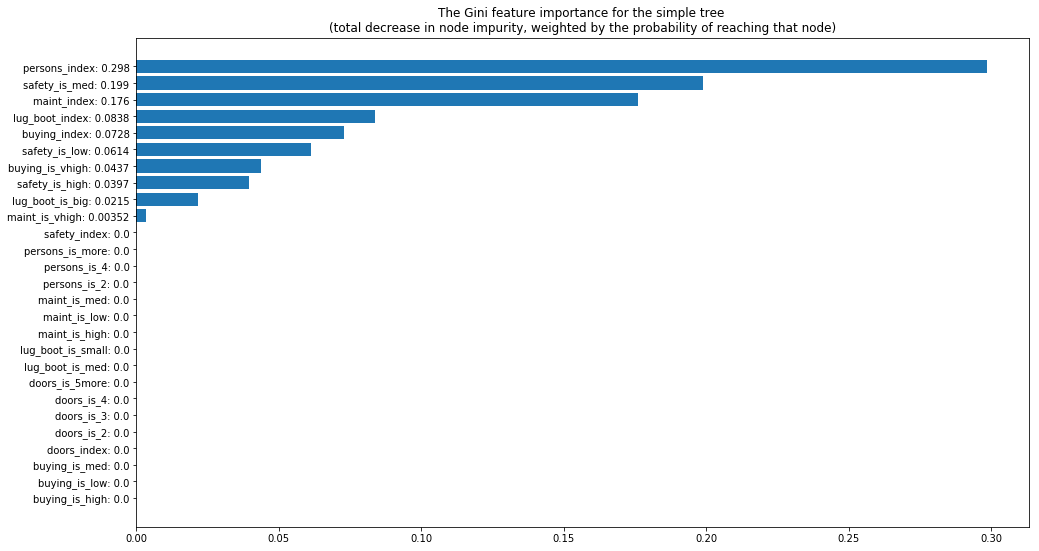

In [11]:
def feature_importance_chart(clf, classifier_name, feature_names):
    sorted_feature_importances, sorted_feature_names = (
        zip(*sorted(zip(clf.feature_importances_, feature_names)))
    )
    plt.figure(figsize=(16, 9))
    plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances)
    plt.yticks(
        range(len(sorted_feature_importances)),
        ["{}: {:.3}".format(a, b) for a, b in zip(sorted_feature_names, sorted_feature_importances)]
    )
    plt.title("The Gini feature importance for the {} \n"
              "(total decrease in node impurity, weighted by the "
              "probability of reaching that node)".format(classifier_name))
    plt.show()

feature_importance_chart(clf, "simple tree", feature_names)

#  Now we generate a fully perfect (complex) tree

In [12]:
max_depth = None  # Full depth
clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X, integer_y)

print("Decision tree trained!")
accuracy = clf.score(X, integer_y)
print("Errors:", 100 - accuracy * 100, "%")
print("Accuracy:", accuracy * 100, "%")

Decision tree trained!
Errors: 0.0 %
Accuracy: 100.0 %


In [13]:
plot_first_tree(clf, class_names, tree_name="our_complex_tree")

FileNotFoundError: [WinError 2] "dot" not found in path.

# Finally, the full feature importance

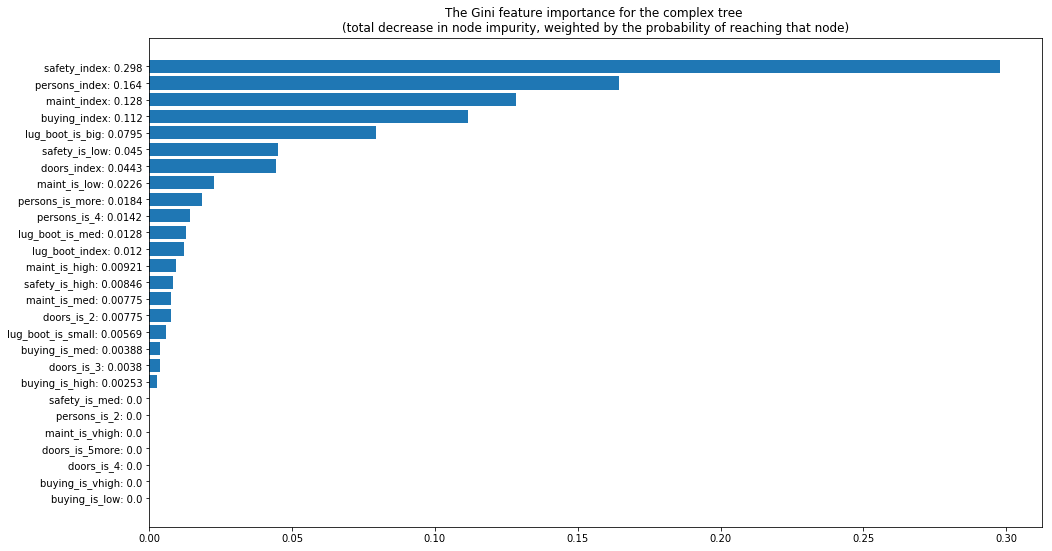

In [47]:
feature_importance_chart(clf, "complex tree", feature_names)

# Implementing C4.5 and ID3 Decision Tree Algorithms with NumPy by comparing both of the algorithms accuracy

In [48]:
data_path = "car.data"
data = np.genfromtxt(data_path, delimiter=",", dtype=str)
labels = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [49]:
print("records: {}".format(len(data)))
print("example record: {}".format(data[0]))
print("\ncolumns:\n")
columns = []
for col in range(len(data[0])):
    print("\t" + labels[col] + ": {}".format(np.unique(data[:,col])))
    columns.append(np.unique(data[:,col]))

records: 1728
example record: ['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']

columns:

	buying: ['high' 'low' 'med' 'vhigh']
	maint: ['high' 'low' 'med' 'vhigh']
	doors: ['2' '3' '4' '5more']
	persons: ['2' '4' 'more']
	lug_boot: ['big' 'med' 'small']
	safety: ['high' 'low' 'med']
	class: ['acc' 'good' 'unacc' 'vgood']


# The foundation of the decision tree algorithms is a criterion (e.g. entropy, Gini, error) with which we can choose the best attribute to add to the tree. ID3 and C4.5 use information gain (entropy) and normalized information gain, respectively.

In [50]:
def weighted_entropy(data, col_num):
    entropies = []
    n_s = []
    entropy_of_attribute = entropy(data[:,col_num])
    for value in columns[col_num]:
        candidate_child = data[data[:,col_num] == value]
        n_s.append(len(candidate_child))
        entropies.append(entropy(candidate_child[:,6]))
    n_s = np.array(n_s)
    n_s = n_s / np.sum(n_s)
    weighted_entropy = n_s.dot(entropies)
    return weighted_entropy, entropy_of_attribute
    
def entropy(data):
    classes = np.unique(data)
    n = len(data)
    n_s = []
    for class_ in classes:
        n_s.append(len(data[data==class_]))
    n_s = np.array(n_s)
    n_s = n_s/n
    n_s = n_s * np.log2(n_s)
    return max(0,-np.sum(n_s))

# Inorder to store our tree, we wll use dictionaries. Each node of the tree is a Python dict.

In [51]:
def build_node(data, entropy, label, depth, class_="TBD", parent=None):
    new_node = dict()
    new_node['data'] = data
    new_node['entropy'] = entropy
    new_node['label'] = label
    new_node['depth'] = depth
    new_node['class'] = class_
    new_node['parent'] = parent
    new_node['children'] = []
    return new_node

root = build_node(data, entropy(data[:,6]), "all data", 0)
classes = np.unique(root['data'][:,6])
print(classes)

['acc' 'good' 'unacc' 'vgood']


# The functions that helps us build our tree and classify its leaves. find_best_split acts on a node, and returns the attribute that leads to the best (possibly normalized) information gain.

In [52]:
def find_best_split(node, c45 = False):
    data = node['data']
    entropy = node['entropy']
    gains = []
    for col_num in range(len(columns) - 1):
        new_entropy, entropy_of_attribute = weighted_entropy(data, col_num)
        if c45:
            if entropy_of_attribute==0:
                gains.append(0)
            else:
                gains.append((entropy - new_entropy) / (entropy_of_attribute))
        else:
            gains.append(entropy - new_entropy)
    if np.max(gains) > 10**-3 :
        best_attribute = np.argmax(gains)
        return best_attribute
    else:
        return -1
    
def classify(node_data):
    data = node_data[:, 6]
    n_s = []
    for class_ in classes:
        n_s.append(len(data[data==class_]))
    return columns[-1][np.argmax(n_s)]
    
labels[find_best_split(root)], classify(root['data'])

('safety', 'unacc')

# This function is recursive and will construct a decision tree out of a root node that contains your training data.

In [53]:
def build_tree(node, c45 = False, max_depth = 999, noisy=False):
    next_split_attribute = find_best_split(node, c45)
    if next_split_attribute == -1 or node['depth'] == max_depth:
        node['class'] = classify(node['data'])
        #this if statement just handles some printing of the tree (rudimentary visualization)
        if noisy:
            label = []
            label.append(node['label'])
            temp_parent = node
            while temp_parent['parent']:
                temp_parent = temp_parent['parent']
                label.append(temp_parent['label'])
            depth = node['depth']
            for i, layer_label in enumerate(reversed(label)):
                for _ in range(i):
                    print("\t", end="")
                if i==depth:
                    print("{} -> class {}".format(layer_label, node['class']))
                else:
                    print("{}".format(layer_label))
                    
    else:
        for value in columns[next_split_attribute]:
            data = node['data'][ node['data'][:, next_split_attribute] == value ]
            entropy_ = entropy(data[:, 6])
            new_node = build_node(data, entropy_, "{} == {}".format(
                                            labels[next_split_attribute],value),
                                            node['depth'] + 1, parent=node)
            build_tree(new_node, c45, max_depth, noisy)
            node['children'].append(new_node)

# Lastly, before building the tree, we need a function to check the tree's accuracy.

In [54]:
def correct(decision_tree):
    if not decision_tree['children']:
        return np.sum(classify(decision_tree['data'])==decision_tree['data'][:,6])
    else:
        n_correct = 0
        for child in decision_tree['children']:
            n_correct += correct(child)
    return n_correct

correct(root)/1728

0.7002314814814815

# Now we compare the On this dataset, C4.5 and ID3 get similar accuracies...

In [55]:
print("Training Accuracy Comparison")
print("---------")
print(" ID3    C4.5")
for depth in range(7):
    root = build_node(data, entropy(data[:,6]), "all data", 0)
    build_tree(root, max_depth=depth, c45=False)
    id3=correct(root)/1728
    root = build_node(data, entropy(data[:,6]), "all data", 0)
    build_tree(root, max_depth=depth, c45=True)
    c45=correct(root)/1728
    print('{:.3f} '.format(round(id3,3)), ' {:.3f}'.format(round(c45,3)))

Training Accuracy Comparison
---------
 ID3    C4.5
0.700   0.700
0.700   0.700
0.778   0.778
0.819   0.824
0.899   0.894
0.964   0.964
1.000   1.000
